In [1]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

In [2]:
# Load pre-processed data
train_df = pd.read_csv("../data/titanic_preprocessed.csv")
X = train_df.drop("Survived", axis=1)
y = train_df["Survived"]

In [3]:
# Split data into training and validation
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print(f"Training set size: {len(X_train)}")
print(f"Validation set size: {len(X_val)}")

Training set size: 712
Validation set size: 179


# Question 1: Implement, train, and plot decision tree model

In [4]:
# Initialize and train decision tree
model = DecisionTreeClassifier(
    random_state=42,
    max_depth=5,
    min_samples_split=10,
    min_samples_leaf=5
)
model.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,5
,min_samples_split,10
,min_samples_leaf,5
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [5]:
# Predicit on validation set
y_pred = model.predict(X_val)

# Evaluate accuracy
accuracy = accuracy_score(y_val, y_pred)
print(f"Validation Accuracy: {accuracy:.4f}")

Validation Accuracy: 0.7542


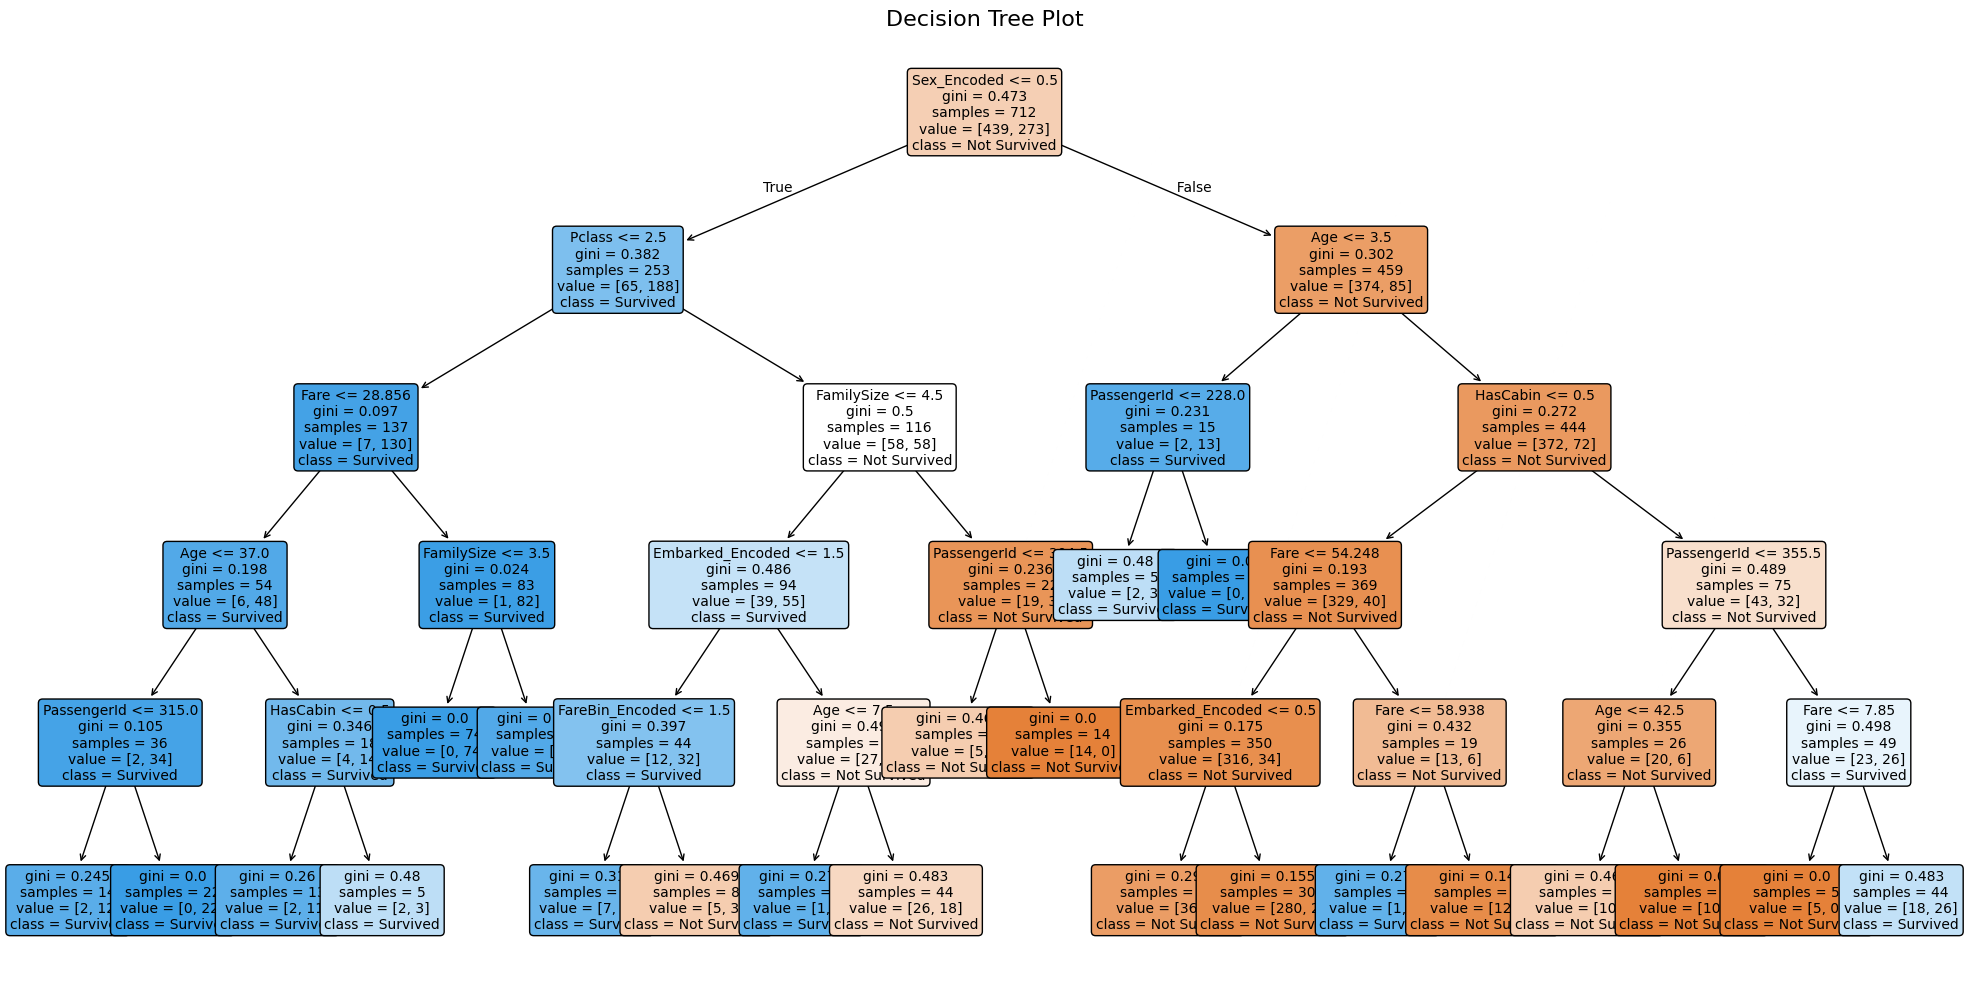

In [6]:
# Plot tree

plt.figure(figsize=(20, 10))

plot_tree(model, 
          feature_names=X_train.columns, 
          class_names=['Not Survived', 'Survived'], 
          filled=True,                     
          rounded=True,                    
          fontsize=10)                     

plt.title("Decision Tree Plot", fontsize=16)
plt.tight_layout()
plt.show()

# Question 2: Apply 5 fold cross validation to decision tree

In [7]:
from sklearn.model_selection import cross_val_score
import numpy as np

In [8]:
# Combine training and validation sets for cross validation
X_full = pd.concat([X_train, X_val])
y_full = pd.concat([y_train, y_val])

In [9]:
# Apply 5 fold cross validation
cv_scores = cross_val_score(
    model, 
    X_full, 
    y_full, 
    cv=5,
    scoring='accuracy'
)

In [10]:
print("Cross-Validation Scores:", cv_scores)
print(f"Average Accuracy: {cv_scores.mean():.4f}")

Cross-Validation Scores: [0.82122905 0.78651685 0.86516854 0.79213483 0.75842697]
Average Accuracy: 0.8047


# Question 3: Implement 5 fold cross validation on Random Forest model

In [11]:
from sklearn.ensemble import RandomForestClassifier

In [12]:
# Initialize Random Forest model
forest_model = RandomForestClassifier(
    n_estimators=100,
    random_state=42,
    max_depth=5,
    min_samples_split=10,
    min_samples_leaf=5
)

In [13]:
# Apply 5 fold cross validation
forest_cv_scores = cross_val_score(
    forest_model,
    X_full,
    y_full,
    cv=5,
    scoring='accuracy'
)

In [14]:
print("Random Forest Cross-Validation Scores:", forest_cv_scores)
print(f"Average Accuracy: {forest_cv_scores.mean():.4f}")

Random Forest Cross-Validation Scores: [0.81005587 0.80898876 0.84269663 0.8258427  0.83146067]
Average Accuracy: 0.8238
